In [1]:
import pandas as pd
import numpy as np
import mysql.connector
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

DB_NAME = "olist_ecommerce"
DB_USER = "root"  
DB_PASSWORD = "root"  
DB_HOST = "localhost"  

engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}")

def execute_query(query):
    with engine.connect() as connection:
        result = pd.read_sql(query, connection)
    return result


# Basic Queries

# 1. List all unique customer cities.

In [2]:
query = """
SELECT customer_id, COUNT(order_id) AS total_orders
FROM orders
GROUP BY customer_id
HAVING total_orders >= 2;
"""
result = execute_query(query)
print(result)


Empty DataFrame
Columns: [customer_id, total_orders]
Index: []


# 2. Count the number of orders placed in 2017.

C:\Users\mishr\AppData\Local\Temp\ipykernel_6184\3259838905.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_count', y='customer_city', data=result, palette='coolwarm')


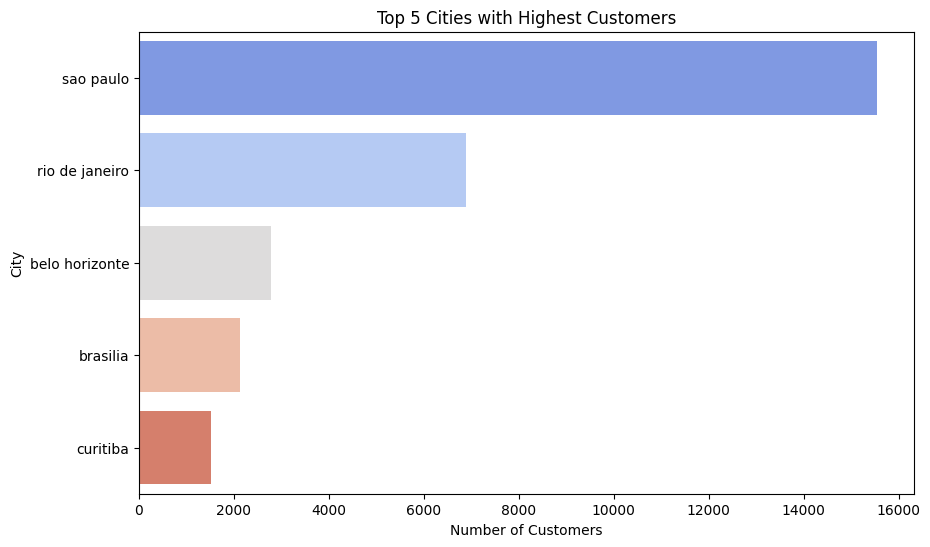

In [3]:
query = """
SELECT customer_city, COUNT(customer_id) AS customer_count
FROM customers
GROUP BY customer_city
ORDER BY customer_count DESC
LIMIT 5;
"""
result = execute_query(query)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_count', y='customer_city', data=result, palette='coolwarm')
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.title("Top 5 Cities with Highest Customers")
plt.show()


# 3. Find the total sales per product category.

    product_category_name  total_revenue
0            beleza_saude     1258681.34
1      relogios_presentes     1205005.68
2         cama_mesa_banho     1036988.68
3           esporte_lazer      988048.97
4  informatica_acessorios      911954.32


C:\Users\mishr\AppData\Local\Temp\ipykernel_6184\4255322103.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10['product_category_name'], x=top_10['total_revenue'], palette='coolwarm')


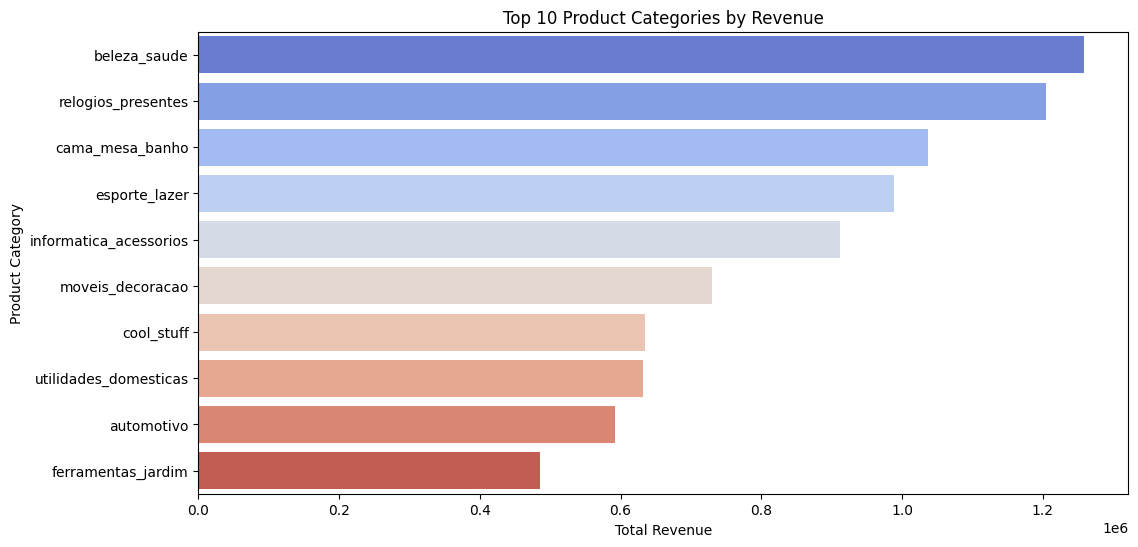

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Run your SQL query and store the result in a DataFrame
query = """
SELECT p.product_category_name, SUM(oi.price) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY total_revenue DESC;
"""

df = execute_query(query)  # Make sure execute_query() returns a DataFrame

# Check if df is properly populated
print(df.head())  # Debugging step

# Select the top 10 categories
top_10 = df.head(10)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10['product_category_name'], x=top_10['total_revenue'], palette='coolwarm')
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.title("Top 10 Product Categories by Revenue")
plt.show()


# 4. Calculate the percentage of orders paid in installments.

In [10]:
query = """
SELECT 
    (SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS installment_percentage
FROM payments;
"""

result = execute_query(query)

# Display the result
print("Percentage of orders paid in installments:", result.iloc[0, 0], "%")


Percentage of orders paid in installments: 49.41763 %


# 5. Count the number of customers from each Brazilian state.

In [11]:
query = """
SELECT 
    customer_state, 
    COUNT(*) AS customer_count
FROM customers
GROUP BY customer_state
ORDER BY customer_count DESC;
"""

result = execute_query(query)

# Display the result
print(result)


   customer_state  customer_count
0              SP           41746
1              RJ           12852
2              MG           11635
3              RS            5466
4              PR            5045
5              SC            3637
6              BA            3380
7              DF            2140
8              ES            2033
9              GO            2020
10             PE            1652
11             CE            1336
12             PA             975
13             MT             907
14             MA             747
15             MS             715
16             PB             536
17             PI             495
18             RN             485
19             AL             413
20             SE             350
21             TO             280
22             RO             253
23             AM             148
24             AC              81
25             AP              68
26             RR              46


# Intermediate Queries

# 1. Calculate the number of orders per month in 2018. (Graph)

In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MySQL connection credentials
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "root",  # Replace with your MySQL password
    "database": "olist_ecommerce"
}

# Establish a database connection
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()


C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\3756866344.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders_2018 = pd.read_sql(query_1, conn)
C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\3756866344.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_orders_2018["month"], y=df_orders_2018["total_orders"], palette="viridis")


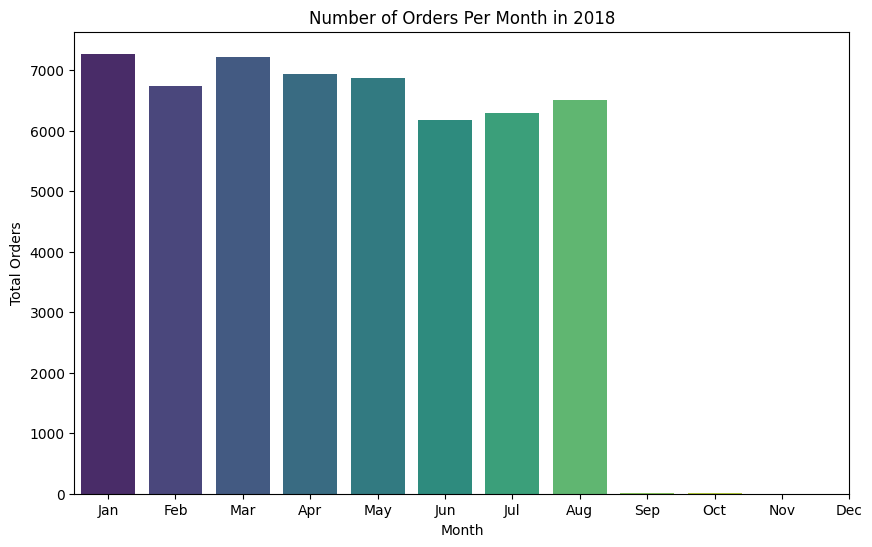

In [7]:
# SQL Query to fetch orders per month in 2018
query_1 = """
SELECT 
    MONTH(order_purchase_timestamp) AS month, 
    COUNT(order_id) AS total_orders
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp)
ORDER BY month;
"""

# Execute query and store results in a Pandas DataFrame
df_orders_2018 = pd.read_sql(query_1, conn)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=df_orders_2018["month"], y=df_orders_2018["total_orders"], palette="viridis")
plt.title("Number of Orders Per Month in 2018")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# 2. Find the average number of products per order, grouped by customer city.

In [8]:
query_2 = """
SELECT 
    c.customer_city, 
    ROUND(AVG(oi.order_item_id), 2) AS avg_products_per_order
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_city
ORDER BY avg_products_per_order DESC
LIMIT 10; -- Showing top 10 cities
"""

df_avg_products = pd.read_sql(query_2, conn)
print(df_avg_products)


C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\4062841757.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_products = pd.read_sql(query_2, conn)


           customer_city  avg_products_per_order
0            celso ramos                    6.08
1                   ipua                    4.46
2         padre carvalho                    4.00
3  alto paraiso de goias                    3.89
4          cicero dantas                    3.65
5          candido godoi                    3.50
6                  datas                    3.50
7       uniao da vitoria                    3.34
8            morro agudo                    3.30
9          inconfidentes                    3.14


# 3. Calculate the percentage of total revenue contributed by each product category.

In [10]:
# Reconnect MySQL before running Query 3
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()


C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\3158728051.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenue_per_category = pd.read_sql(query_3, conn)
C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\3158728051.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_revenue_per_category["revenue_percentage"], y=df_revenue_per_category["category"], palette="coolwarm")


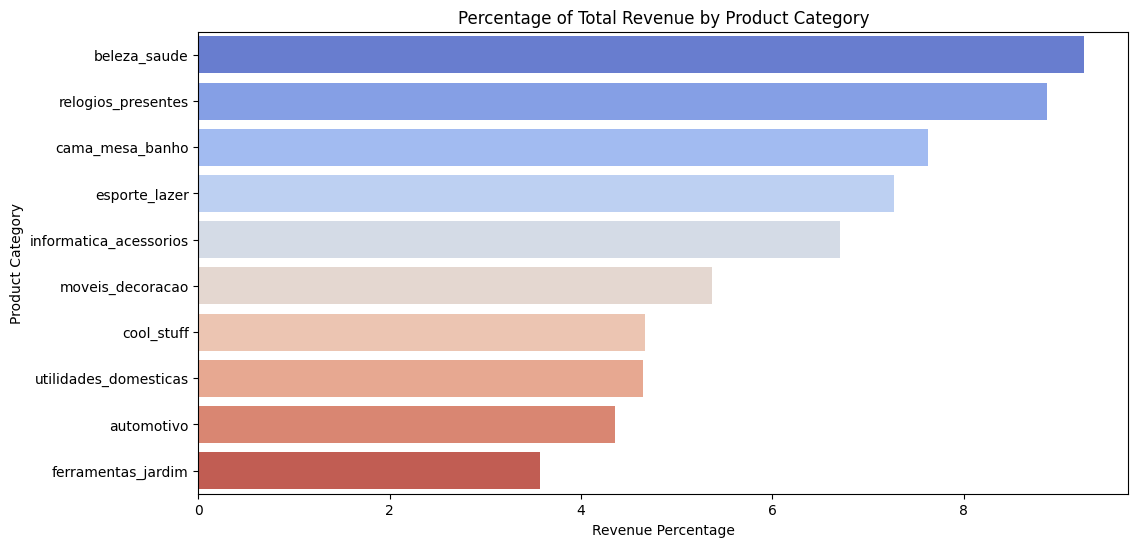

In [13]:
query_3 = """
SELECT 
    p.product_category_name AS category, 
    ROUND(SUM(oi.price) * 100 / (SELECT SUM(price) FROM order_items), 2) AS revenue_percentage
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY revenue_percentage DESC
LIMIT 10; -- Showing top 10 categories
"""

df_revenue_per_category = pd.read_sql(query_3, conn)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=df_revenue_per_category["revenue_percentage"], y=df_revenue_per_category["category"], palette="coolwarm")
plt.title("Percentage of Total Revenue by Product Category")
plt.xlabel("Revenue Percentage")
plt.ylabel("Product Category")
plt.show()



# 4. Identify the correlation between product price and the number of times a product has been purchased.

C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\166464518.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_correlation = pd.read_sql(query_4, conn)


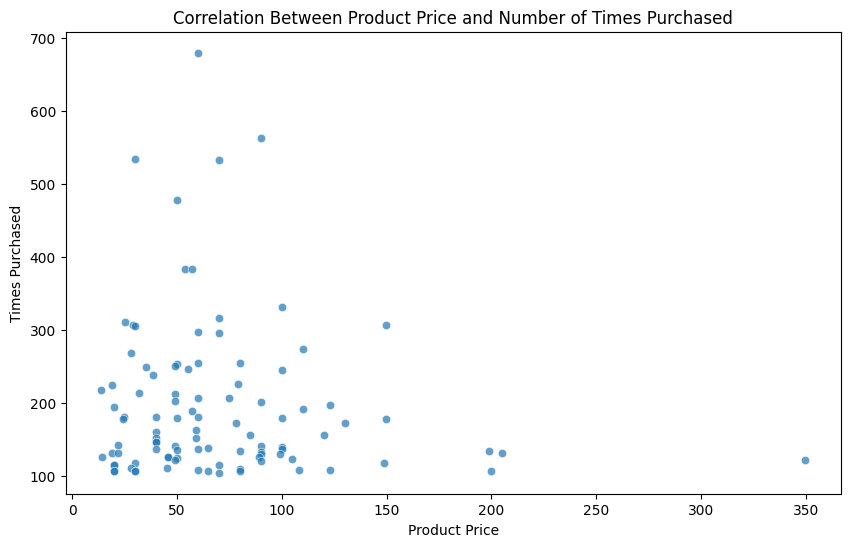

In [17]:
# Reconnect MySQL before running Query 3
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

query_4 = """
SELECT 
    p.product_category_name AS category,
    oi.price AS product_price,
    COUNT(oi.order_id) AS times_purchased
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name, oi.price
ORDER BY times_purchased DESC
LIMIT 100;
"""

df_correlation = pd.read_sql(query_4, conn)

# Plot correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_correlation["product_price"], y=df_correlation["times_purchased"], alpha=0.7)
plt.title("Correlation Between Product Price and Number of Times Purchased")
plt.xlabel("Product Price")
plt.ylabel("Times Purchased")
plt.show()


# 5. Calculate the total revenue generated by each seller and rank them by revenue.

In [18]:
query_5 = """
SELECT 
    s.seller_id, 
    SUM(oi.price) AS total_revenue,
    RANK() OVER (ORDER BY SUM(oi.price) DESC) AS rank_position
FROM order_items oi
JOIN sellers s ON oi.seller_id = s.seller_id
GROUP BY s.seller_id
ORDER BY total_revenue DESC
LIMIT 10; -- Top 10 sellers
"""

df_seller_revenue = pd.read_sql(query_5, conn)
print(df_seller_revenue)


C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\49356611.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_seller_revenue = pd.read_sql(query_5, conn)


                          seller_id  total_revenue  rank_position
0  4869f7a5dfa277a7dca6462dcf3b52b2      229472.63              1
1  53243585a1d6dc2643021fd1853d8905      222776.05              2
2  4a3ca9315b744ce9f8e9374361493884      200472.92              3
3  fa1c13f2614d7b5c4749cbc52fecda94      194042.03              4
4  7c67e1448b00f6e969d365cea6b010ab      187923.89              5
5  7e93a43ef30c4f03f38b393420bc753a      176431.87              6
6  da8622b14eb17ae2831f4ac5b9dab84a      160236.57              7
7  7a67c85e85bb2ce8582c35f2203ad736      141745.53              8
8  1025f0e2d44d7041d6cf58b6550e0bfa      138968.55              9
9  955fee9216a65b617aa5c0531780ce60      135171.70             10


# Advanced Queries 

In [20]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MySQL connection credentials
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "root",  # Replace with your actual MySQL password
    "database": "olist_ecommerce"
}

# Reconnect MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()


# 1. Calculate the moving average of order values for each customer over their order history.

In [21]:
query_1 = """
WITH order_values AS (
    SELECT 
        o.customer_id, 
        o.order_id, 
        SUM(oi.price) AS order_value,
        o.order_purchase_timestamp
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY o.customer_id, o.order_id, o.order_purchase_timestamp
),
moving_avg AS (
    SELECT 
        customer_id, 
        order_id, 
        order_value,
        order_purchase_timestamp,
        AVG(order_value) OVER (
            PARTITION BY customer_id 
            ORDER BY order_purchase_timestamp 
            ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
        ) AS moving_avg_value
    FROM order_values
)
SELECT * FROM moving_avg
ORDER BY customer_id, order_purchase_timestamp;
"""

df_moving_avg = pd.read_sql(query_1, conn)
print(df_moving_avg.head(10))


C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\103979032.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_moving_avg = pd.read_sql(query_1, conn)


                        customer_id                          order_id  \
0  00012a2ce6f8dcda20d059ce98491703  5f79b5b0931d63f1a42989eb65b9da6e   
1  000161a058600d5901f007fab4c27140  a44895d095d7e0702b6a162fa2dbeced   
2  0001fd6190edaaf884bcaf3d49edf079  316a104623542e4d75189bb372bc5f8d   
3  0002414f95344307404f0ace7a26f1d5  5825ce2e88d5346438686b0bba99e5ee   
4  000379cdec625522490c315e70c7a9fb  0ab7fb08086d4af9141453c91878ed7a   
5  0004164d20a9e969af783496f3408652  cd3558a10d854487b4f907e9b326a4fc   
6  000419c5494106c306a97b5635748086  07f6c3baf9ac86865b60f640c4f923c6   
7  00046a560d407e99b969756e0b10f282  8c3d752c5c02227878fae49aeaddbfd7   
8  00050bf6e01e69d5c0fd612f1bcfb69c  fa906f338cee30a984d0945b3832e431   
9  000598caf2ef4117407665ac33275130  9b961b894e797f63622137ff7eb1c1af   

   order_value order_purchase_timestamp  moving_avg_value  
0        89.80      2017-11-14 16:08:26             89.80  
1        54.90      2017-07-16 09:40:32             54.90  
2       179.99  

# 2. Calculate the cumulative sales per month for each year. (Graph)

C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\3027571054.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cumulative_sales = pd.read_sql(query_2, conn)


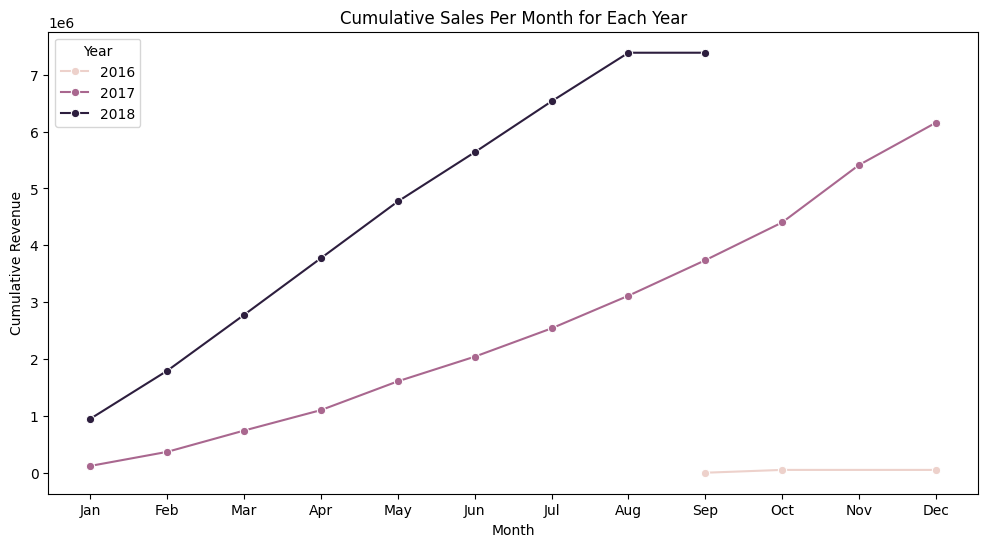

In [22]:
query_2 = """
SELECT 
    YEAR(order_purchase_timestamp) AS year,
    MONTH(order_purchase_timestamp) AS month,
    SUM(oi.price) AS monthly_revenue,
    SUM(SUM(oi.price)) OVER (
        PARTITION BY YEAR(order_purchase_timestamp) 
        ORDER BY MONTH(order_purchase_timestamp)
    ) AS cumulative_revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY year, month
ORDER BY year, month;
"""

df_cumulative_sales = pd.read_sql(query_2, conn)

# Plot cumulative sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cumulative_sales, x="month", y="cumulative_revenue", hue="year", marker="o")
plt.title("Cumulative Sales Per Month for Each Year")
plt.xlabel("Month")
plt.ylabel("Cumulative Revenue")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.show()


# 3. Calculate the year-over-year growth rate of total sales.

In [23]:
query_3 = """
WITH yearly_sales AS (
    SELECT 
        YEAR(order_purchase_timestamp) AS year,
        SUM(oi.price) AS total_sales
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY year
)
SELECT 
    year, 
    total_sales,
    LAG(total_sales) OVER (ORDER BY year) AS previous_year_sales,
    ROUND(((total_sales - LAG(total_sales) OVER (ORDER BY year)) / LAG(total_sales) OVER (ORDER BY year)) * 100, 2) AS yoy_growth
FROM yearly_sales;
"""

df_yoy_growth = pd.read_sql(query_3, conn)
print(df_yoy_growth)


C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\3243714310.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_yoy_growth = pd.read_sql(query_3, conn)


   year   total_sales  previous_year_sales  yoy_growth
0  2016  4.978592e+04                  NaN         NaN
1  2017  6.155807e+06         4.978592e+04    12264.55
2  2018  7.386051e+06         6.155807e+06       19.99


# 4. 4. Calculate the customer retention rate, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [24]:
query_4 = """
WITH first_purchase AS (
    SELECT 
        customer_id, 
        MIN(order_purchase_timestamp) AS first_order_date
    FROM orders
    GROUP BY customer_id
),
repeat_customers AS (
    SELECT 
        f.customer_id,
        COUNT(o.order_id) AS repeat_purchases
    FROM first_purchase f
    JOIN orders o 
        ON f.customer_id = o.customer_id 
        AND o.order_purchase_timestamp > f.first_order_date
        AND o.order_purchase_timestamp <= DATE_ADD(f.first_order_date, INTERVAL 6 MONTH)
    GROUP BY f.customer_id
)
SELECT 
    (COUNT(repeat_purchases) * 100) / (SELECT COUNT(*) FROM first_purchase) AS retention_rate
FROM repeat_customers;
"""

df_retention_rate = pd.read_sql(query_4, conn)
print(f"Customer Retention Rate: {df_retention_rate.iloc[0, 0]}%")


C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\2058469596.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_retention_rate = pd.read_sql(query_4, conn)


Customer Retention Rate: 0.0%


# 5. Identify the top 3 customers who spent the most money in each year.

C:\Users\mishr\AppData\Local\Temp\ipykernel_9324\1775224318.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_customers = pd.read_sql(query_5, conn)


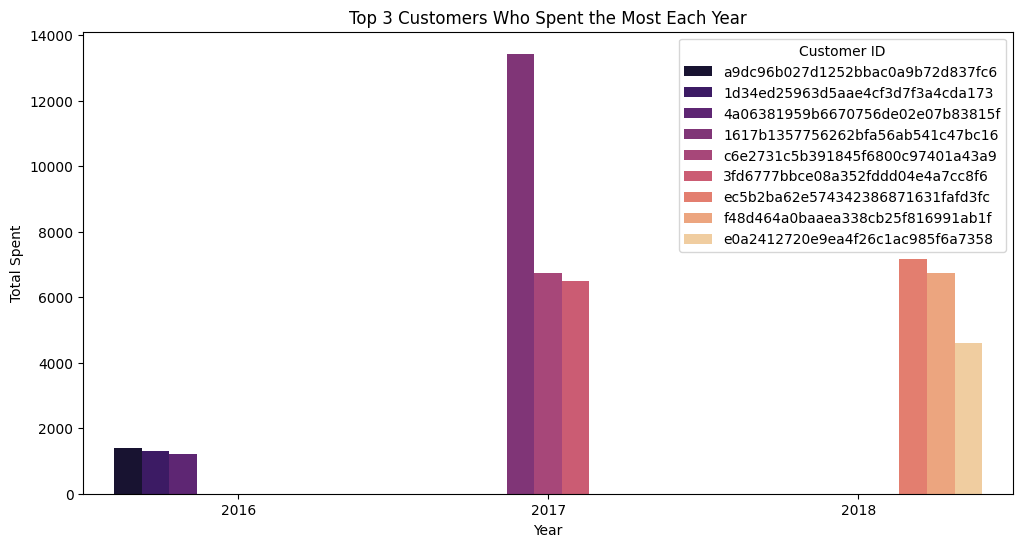

In [25]:
query_5 = """
WITH yearly_spending AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS year,
        o.customer_id,
        SUM(oi.price) AS total_spent,
        RANK() OVER (PARTITION BY YEAR(o.order_purchase_timestamp) ORDER BY SUM(oi.price) DESC) AS rank_position
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY year, o.customer_id
)
SELECT * FROM yearly_spending WHERE rank_position <= 3;
"""

df_top_customers = pd.read_sql(query_5, conn)

# Plot top customers per year
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_customers, x="year", y="total_spent", hue="customer_id", palette="magma")
plt.title("Top 3 Customers Who Spent the Most Each Year")
plt.xlabel("Year")
plt.ylabel("Total Spent")
plt.legend(title="Customer ID")
plt.show()
